## Kumar Shivraj Bhakat 21BTRCL055

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.image import imread
import cv2
import random
from os import listdir

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation,Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train = r'C:\Users\bhaka\Desktop\CVIP\project\train'
validation = r'C:\Users\bhaka\Desktop\CVIP\project\valid'
test = r'C:\Users\bhaka\Desktop\CVIP\project\test'

In [30]:
batch_size = 16
image_size = (224,224)
seed = 1908

In [31]:
# Define data generators with rescaling for training, validation, and testing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [32]:
# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=image_size,
    batch_size=batch_size,
    seed=seed,
    class_mode='categorical'
)

# Flow validation images in batches of 16 using valid_datagen generator
validation_generator = valid_datagen.flow_from_directory(
    validation,
    target_size=image_size,
    batch_size=batch_size,
    seed=seed,
    class_mode='categorical'
)

# Flow test images in batches of 16 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=image_size,
    batch_size=batch_size,
    seed=seed,
    class_mode='categorical'
)

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [33]:
# Create datasets from generators and repeat them
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 224, 224, 3], [None, 525])  # Assuming 525 is the number of classes
).repeat()

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 224, 224, 3], [None, 525])  # Assuming 525 is the number of classes
).repeat()

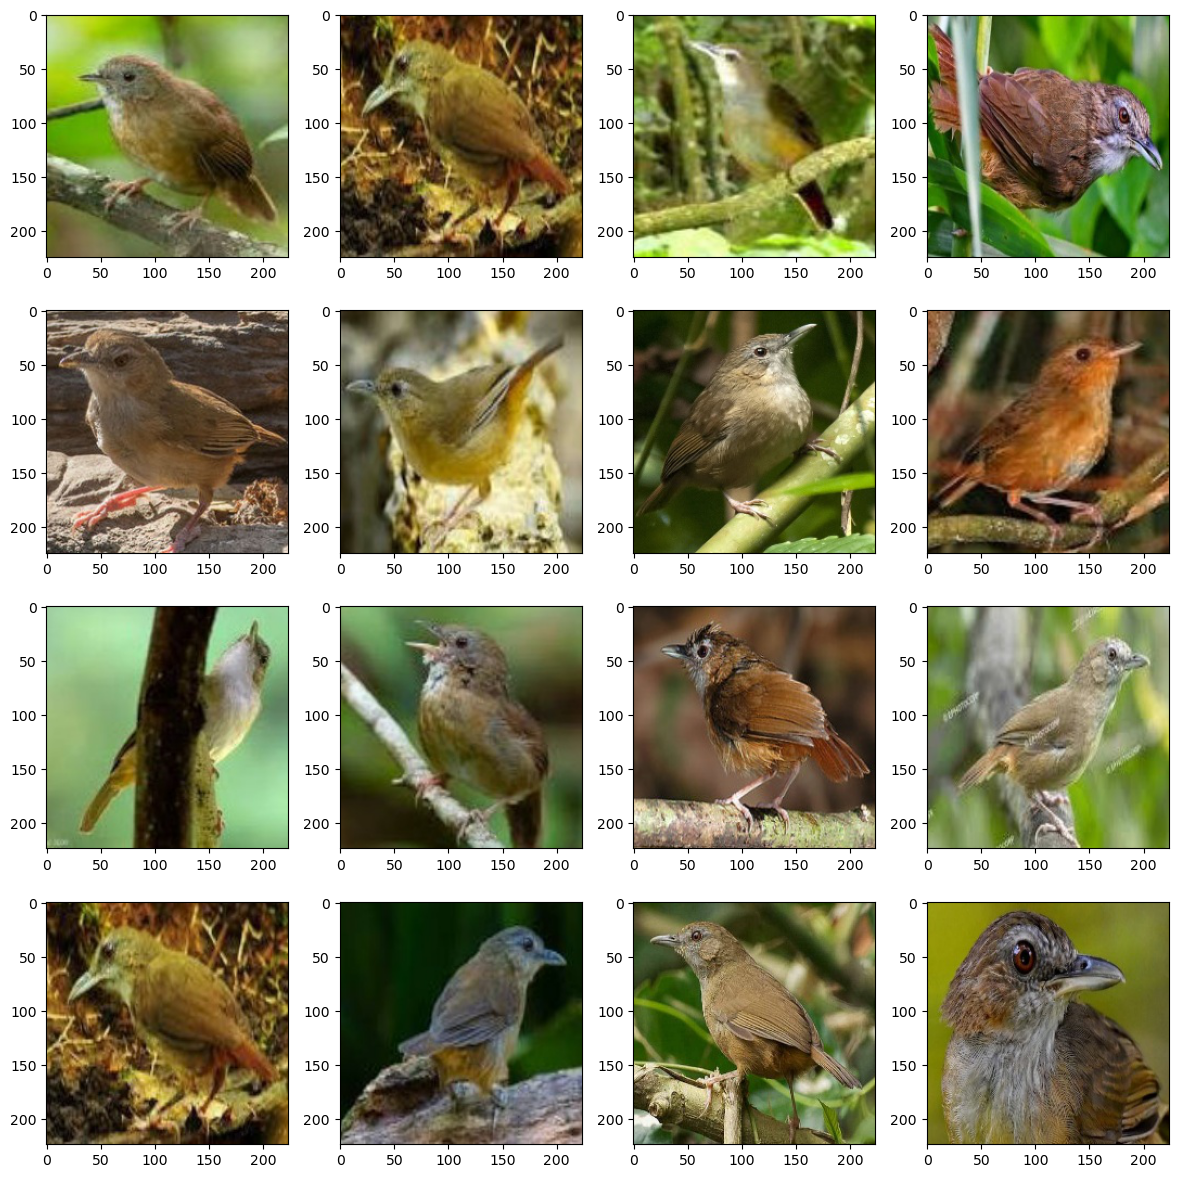

In [34]:
plt.figure(figsize=(12,12))

for i in range(1,17):
    path= r'C:\Users\bhaka\Desktop\CVIP\project\train\ABBOTTS BABBLER' # defining the path
     # using subplots
    plt.subplot(4,4,i)
    plt.tight_layout()
    # using random images
    ramd_img=imread(path +'/'+random.choice(sorted(listdir(path))))
    plt.imshow(ramd_img)
    

    

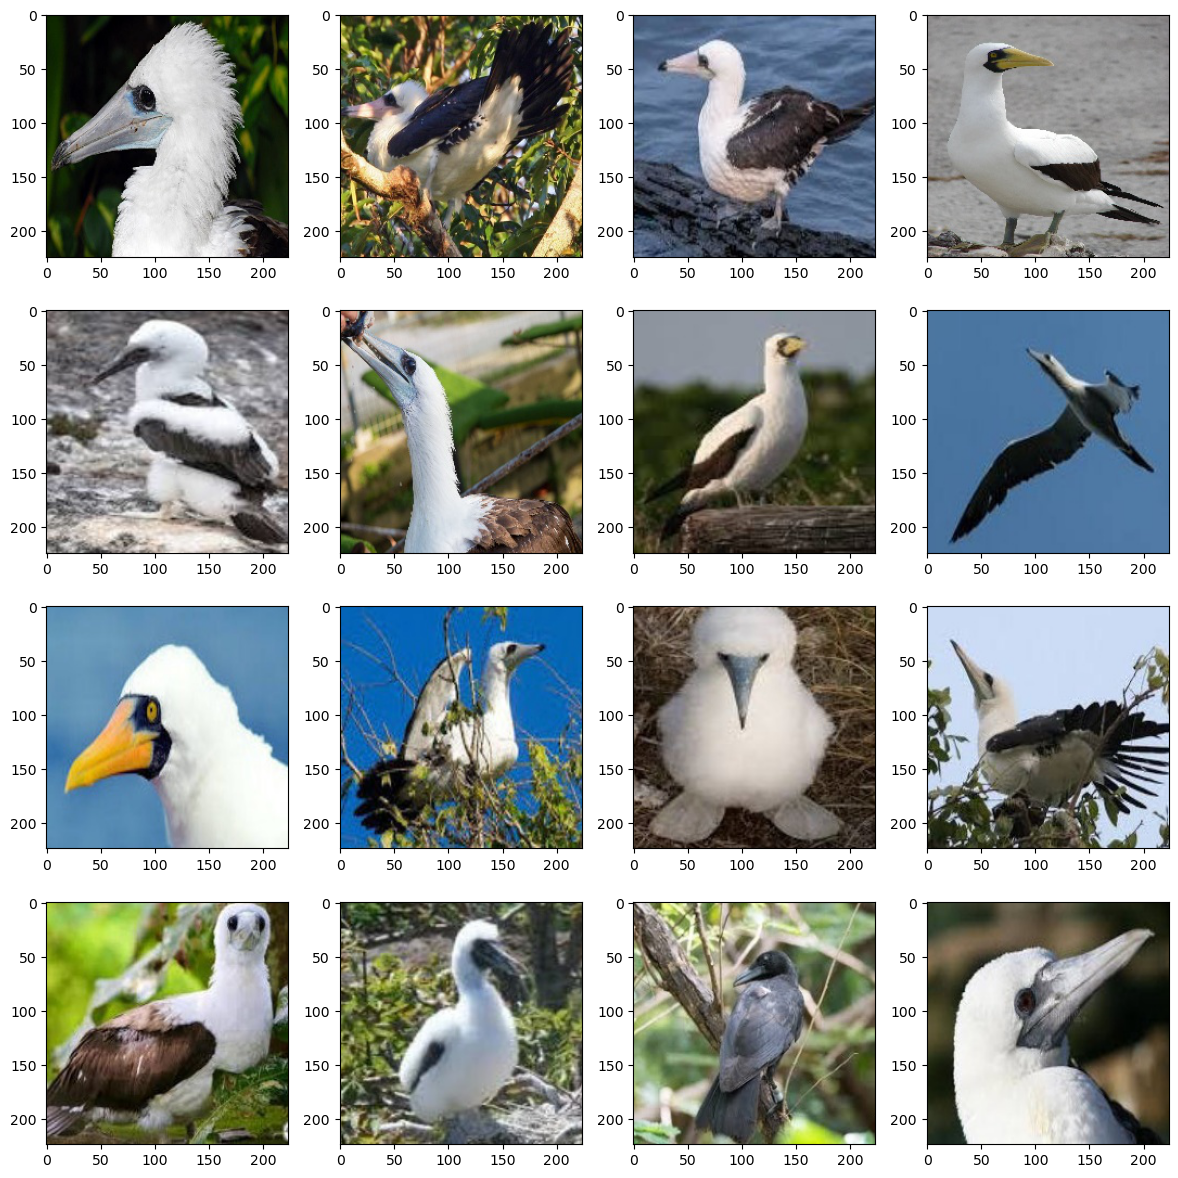

In [35]:
plt.figure(figsize=(12,12))

for i in range(1,17):
    path= r'C:\Users\bhaka\Desktop\CVIP\project\train\ABBOTTS BOOBY' # defining the path
     # using subplots
    plt.subplot(4,4,i)
    plt.tight_layout()
    # using random images
    ramd_img=imread(path +'/'+random.choice(sorted(listdir(path))))
    plt.imshow(ramd_img)
    
 

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model
model = tf.keras.models.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, input_shape=(224, 224, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=256, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=525, activation='softmax')
])


In [37]:

import os
checkpoint_dir = './training_checkpoints'
checkpoint_path = os.path.join(checkpoint_dir, "model_checkpoint.keras")

# Define the callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True,
    verbose=0
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
    verbose=0
)


In [38]:
lr = 0.0015
epochs = 23

In [39]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
# Now, when you train your model, it will continuously generate batches from your dataset until the specified number of epochs is completed.
model.fit(
    train_dataset,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_dataset,
    validation_steps=validation_generator.samples // batch_size,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]  # Add callbacks
)

Epoch 1/23
5289/5289 ━━━━━━━━━━━━━━━━━━━━ 1258s 237ms/step - accuracy: 0.0251 - loss: 5.6448 - val_accuracy: 0.1726 - val_loss: 3.9663
Epoch 2/23
5289/5289 ━━━━━━━━━━━━━━━━━━━━ 1140s 216ms/step - accuracy: 0.1258 - loss: 4.2251 - val_accuracy: 0.3346 - val_loss: 3.0835
Epoch 3/23
5289/5289 ━━━━━━━━━━━━━━━━━━━━ 1137s 215ms/step - accuracy: 0.2064 - loss: 3.6576 - val_accuracy: 0.3971 - val_loss: 2.6415
Epoch 4/23
5289/5289 ━━━━━━━━━━━━━━━━━━━━ 1148s 217ms/step - accuracy: 0.2681 - loss: 3.2744 - val_accuracy: 0.4737 - val_loss: 2.4669
Epoch 5/23
5289/5289 ━━━━━━━━━━━━━━━━━━━━ 1135s 215ms/step - accuracy: 0.3139 - loss: 3.0082 - val_accuracy: 0.5213 - val_loss: 2.3287
Epoch 6/23
5289/5289 ━━━━━━━━━━━━━━━━━━━━ 1139s 215ms/step - accuracy: 0.3452 - loss: 2.8316 - val_accuracy: 0.5527 - val_loss: 3.6101
Epoch 7/23
5289/5289 ━━━━━━━━━━━━━━━━━━━━ 1142s 216ms/step - accuracy: 0.3688 - loss: 2.7034 - val_accuracy: 0.5539 - val_loss: 3.6491
Epoch 8/23
5289/5289 ━━━━━━━━━━━━━━━━━━━━ 1141s 216ms/s

Model is already trained and saved as "bird_classification.keras trained for 40 epochs in that i got accuracy of 0.82 

In [41]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

  2/165 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.5781 - loss: 1.3118 

C:\Users\bhaka\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.6902 - loss: 1.2442


In [42]:
# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 1.2076164484024048
Test Accuracy: 0.7104762196540833


In [43]:
import tensorflow as tf
# Save the model
model.save('bird_species_predictor.keras')


In [44]:
class_labels = [
    'ABBOTTS BABBLER',
    'ABBOTTS BOOBY',
    'ABYSSINIAN GROUND HORNBILL',
    'AFRICAN CROWNED CRANE',
    'AFRICAN EMERALD CUCKOO',
    'AFRICAN FIREFINCH',
    'AFRICAN OYSTER CATCHER',
    'AFRICAN PIED HORNBILL',
    'AFRICAN PYGMY GOOSE',
    'ALBATROSS',
    'ALBERTS TOWHEE',
    'ALEXANDRINE PARAKEET',
    'ALPINE CHOUGH',
    'ALTAMIRA YELLOWTHROAT',
    'AMERICAN AVOCET',
    'AMERICAN BITTERN',
    'AMERICAN COOT',
    'AMERICAN DIPPER',
    'AMERICAN FLAMINGO',
    'AMERICAN GOLDFINCH',
    'AMERICAN KESTREL',
    'AMERICAN PIPIT',
    'AMERICAN REDSTART',
    'AMERICAN ROBIN',
    'AMERICAN WIGEON',
    'AMETHYST WOODSTAR',
    'ANDEAN GOOSE',
    'ANDEAN LAPWING',
    'ANDEAN SISKIN',
    'ANHINGA',
    'ANIANIAU',
    'ANNAS HUMMINGBIRD',
    'ANTBIRD',
    'ANTILLEAN EUPHONIA',
    'APAPANE',
    'APOSTLEBIRD',
    'ARARIPE MANAKIN',
    'ASHY STORM PETREL',
    'ASHY THRUSHBIRD',
    'ASIAN CRESTED IBIS',
    'ASIAN DOLLARD BIRD',
    'ASIAN GREEN BEE EATER',
    'ASIAN OPENBILL STORK',
    'AUCKLAND SHAQ',
    'AUSTRAL CANASTERO',
    'AUSTRALASIAN FIGBIRD',
    'AVADAVAT',
    'AZARAS SPINETAIL',
    'AZURE BREASTED PITTA',
    'AZURE JAY',
    'AZURE TANAGER',
    'AZURE TIT',
    'BAIKAL TEAL',
    'BALD EAGLE',
    'BALD IBIS',
    'BALI STARLING',
    'BALTIMORE ORIOLE',
    'BANANAQUIT',
    'BAND TAILED GUAN',
    'BANDED BROADBILL',
    'BANDED PITA',
    'BANDED STILT',
    'BAR-TAILED GODWIT',
    'BARN OWL',
    'BARN SWALLOW',
    'BARRED PUFFBIRD',
    'BARROWS GOLDENEYE',
    'BAY-BREASTED WARBLER',
    'BEARDED BARBET',
    'BEARDED BELLBIRD',
    'BEARDED REEDLING',
    'BELTED KINGFISHER',
    'BIRD OF PARADISE',
    'BLACK AND YELLOW BROADBILL',
    'BLACK BAZA',
    'BLACK BREASTED PUFFBIRD',
    'BLACK COCKATO',
    'BLACK FACED SPOONBILL',
    'BLACK FRANCOLIN',
    'BLACK HEADED CAIQUE',
    'BLACK NECKED STILT',
    'BLACK SKIMMER',
    'BLACK SWAN',
    'BLACK TAIL CRAKE',
    'BLACK THROATED BUSHTIT',
    'BLACK THROATED HUET',
    'BLACK THROATED WARBLER',
    'BLACK VENTED SHEARWATER',
    'BLACK VULTURE',
    'BLACK-CAPPED CHICKADEE',
    'BLACK-NECKED GREBE',
    'BLACK-THROATED SPARROW',
    'BLACKBURNIAM WARBLER',
    'BLONDE CRESTED WOODPECKER',
    'BLOOD PHEASANT',
    'BLUE COAU',
    'BLUE DACNIS',
    'BLUE GRAY GNATCATCHER',
    'BLUE GROSBEAK',
    'BLUE GROUSE',
    'BLUE HERON',
    'BLUE MALKOHA',
    'BLUE THROATED PIPING GUAN',
    'BLUE THROATED TOUCANET',
    'BOBOLINK',
    'BORNEAN BRISTLEHEAD',
    'BORNEAN LEAFBIRD',
    'BORNEAN PHEASANT',
    'BRANDT CORMARANT',
    'BREWERS BLACKBIRD',
    'BROWN CREPPER',
    'BROWN HEADED COWBIRD',
    'BROWN NOODY',
    'BROWN THRASHER',
    'BUFFLEHEAD',
    'BULWERS PHEASANT',
    'BURCHELLS COURSER',
    'BUSH TURKEY',
    'CAATINGA CACHOLOTE',
    'CABOTS TRAGOPAN',
    'CACTUS WREN',
    'CALIFORNIA CONDOR',
    'CALIFORNIA GULL',
    'CALIFORNIA QUAIL',
    'CAMPO FLICKER',
    'CANARY',
    'CANVASBACK',
    'CAPE GLOSSY STARLING',
    'CAPE LONGCLAW',
    'CAPE MAY WARBLER',
    'CAPE ROCK THRUSH',
    'CAPPED HERON',
    'CAPUCHINBIRD',
    'CARMINE BEE-EATER',
    'CASPIAN TERN',
    'CASSOWARY',
    'CEDAR WAXWING',
    'CERULEAN WARBLER',
    'CHARA DE COLLAR',
    'CHATTERING LORY',
    'CHESTNET BELLIED EUPHONIA',
    'CHESTNUT WINGED CUCKOO',
    'CHINESE BAMBOO PARTRIDGE',
    'CHINESE POND HERON',
    'CHIPPING SPARROW',
    'CHUCAO TAPACULO',
    'CHUKAR PARTRIDGE',
    'CINNAMON ATTILA',
    'CINNAMON FLYCATCHER',
    'CINNAMON TEAL',
    'CLARKS GREBE',
    'CLARKS NUTCRACKER',
    'COCK OF THE  ROCK',
    'COCKATOO',
    'COLLARED ARACARI',
    'COLLARED CRESCENTCHEST',
    'COMMON FIRECREST',
    'COMMON GRACKLE',
    'COMMON HOUSE MARTIN',
    'COMMON IORA',
    'COMMON LOON',
    'COMMON POORWILL',
    'COMMON STARLING',
    'COPPERSMITH BARBET',
    'COPPERY TAILED COUCAL',
    'CRAB PLOVER',
    'CRANE HAWK',
    'CREAM COLORED WOODPECKER',
    'CRESTED AUKLET',
    'CRESTED CARACARA',
    'CRESTED COUA',
    'CRESTED FIREBACK',
    'CRESTED KINGFISHER',
    'CRESTED NUTHATCH',
    'CRESTED OROPENDOLA',
    'CRESTED SERPENT EAGLE',
    'CRESTED SHRIKETIT',
    'CRESTED WOOD PARTRIDGE',
    'CRIMSON CHAT',
    'CRIMSON SUNBIRD',
    'CROW',
    'CUBAN TODY',
    'CUBAN TROGON',
    'CURL CRESTED ARACURI',
    'D-ARNAUDS BARBET',
    'DALMATIAN PELICAN',
    'DARJEELING WOODPECKER',
    'DARK EYED JUNCO',
    'DAURIAN REDSTART',
    'DEMOISELLE CRANE',
    'DOUBLE BARRED FINCH',
    'DOUBLE BRESTED CORMARANT',
    'DOUBLE EYED FIG PARROT',
    'DOWNY WOODPECKER',
    'DUNLIN',
    'DUSKY LORY',
    'DUSKY ROBIN',
    'EARED PITA',
    'EASTERN BLUEBIRD',
    'EASTERN BLUEBONNET',
    'EASTERN GOLDEN WEAVER',
    'EASTERN MEADOWLARK',
    'EASTERN ROSELLA',
    'EASTERN TOWEE',
    'EASTERN WIP POOR WILL',
    'EASTERN YELLOW ROBIN',
    'ECUADORIAN HILLSTAR',
    'EGYPTIAN GOOSE',
    'ELEGANT TROGON',
    'ELLIOTS  PHEASANT',
    'EMERALD TANAGER',
    'EMPEROR PENGUIN',
    'EMU',
    'ENGGANO MYNA',
    'EURASIAN BULLFINCH',
    'EURASIAN GOLDEN ORIOLE',
    'EURASIAN MAGPIE',
    'EUROPEAN GOLDFINCH',
    'EUROPEAN TURTLE DOVE',
    'EVENING GROSBEAK',
    'FAIRY BLUEBIRD',
    'FAIRY PENGUIN',
    'FAIRY TERN',
    'FAN TAILED WIDOW',
    'FASCIATED WREN',
    'FIERY MINIVET',
    'FIORDLAND PENGUIN',
    'FIRE TAILLED MYZORNIS',
    'FLAME BOWERBIRD',
    'FLAME TANAGER',
    'FOREST WAGTAIL',
    'FRIGATE',
    'FRILL BACK PIGEON',
    'GAMBELS QUAIL',
    'GANG GANG COCKATOO',
    'GILA WOODPECKER',
    'GILDED FLICKER',
    'GLOSSY IBIS',
    'GO AWAY BIRD',
    'GOLD WING WARBLER',
    'GOLDEN BOWER BIRD',
    'GOLDEN CHEEKED WARBLER',
    'GOLDEN CHLOROPHONIA',
    'GOLDEN EAGLE',
    'GOLDEN PARAKEET',
    'GOLDEN PHEASANT',
    'GOLDEN PIPIT',
    'GOULDIAN FINCH',
    'GRANDALA',
    'GRAY CATBIRD',
    'GRAY KINGBIRD',
    'GRAY PARTRIDGE',
    'GREAT ARGUS',
    'GREAT GRAY OWL',
    'GREAT JACAMAR',
    'GREAT KISKADEE',
    'GREAT POTOO',
    'GREAT TINAMOU',
    'GREAT XENOPS',
    'GREATER PEWEE',
    'GREATER PRAIRIE CHICKEN',
    'GREATOR SAGE GROUSE',
    'GREEN BROADBILL',
    'GREEN JAY',
    'GREEN MAGPIE',
    'GREEN WINGED DOVE',
    'GREY CUCKOOSHRIKE',
    'GREY HEADED CHACHALACA',
    'GREY HEADED FISH EAGLE',
    'GREY PLOVER',
    'GROVED BILLED ANI',
    'GUINEA TURACO',
    'GUINEAFOWL',
    'GURNEYS PITTA',
    'GYRFALCON',
    'HAMERKOP',
    'HARLEQUIN DUCK',
    'HARLEQUIN QUAIL',
    'HARPY EAGLE',
    'HAWAIIAN GOOSE',
    'HAWFINCH',
    'HELMET VANGA',
    'HEPATIC TANAGER',
    'HIMALAYAN BLUETAIL',
    'HIMALAYAN MONAL',
    'HOATZIN',
    'HOODED MERGANSER',
    'HOOPOES',
    'HORNED GUAN',
    'HORNED LARK',
    'HORNED SUNGEM',
    'HOUSE FINCH',
    'HOUSE SPARROW',
    'HYACINTH MACAW',
    'IBERIAN MAGPIE',
    'IBISBILL',
    'IMPERIAL SHAQ',
    'INCA TERN',
    'INDIAN BUSTARD',
    'INDIAN PITTA',
    'INDIAN ROLLER',
    'INDIAN VULTURE',
    'INDIGO BUNTING',
    'INDIGO FLYCATCHER',
    'INLAND DOTTEREL',
    'IVORY BILLED ARACARI',
    'IVORY GULL',
    'IWI',
    'JABIRU',
    'JACK SNIPE',
    'JACOBIN PIGEON',
    'JANDAYA PARAKEET',
    'JAPANESE ROBIN',
    'JAVA SPARROW',
    'JOCOTOCO ANTPITTA',
    'KAGU',
    'KAKAPO',
    'KILLDEAR',
    'KING EIDER',
    'KING VULTURE',
    'KIWI',
    'KNOB BILLED DUCK',
    'KOOKABURRA',
    'LARK BUNTING',
    'LAUGHING GULL',
    'LAZULI BUNTING',
    'LESSER ADJUTANT',
    'LILAC ROLLER',
    'LIMPKIN',
    'LITTLE AUK',
    'LOGGERHEAD SHRIKE',
    'LONG-EARED OWL',
    'LOONEY BIRDS',
    'LUCIFER HUMMINGBIRD',
    'MAGPIE GOOSE',
    'MALABAR HORNBILL',
    'MALACHITE KINGFISHER',
    'MALAGASY WHITE EYE',
    'MALEO',
    'MALLARD DUCK',
    'MANDRIN DUCK',
    'MANGROVE CUCKOO',
    'MARABOU STORK',
    'MASKED BOBWHITE',
    'MASKED BOOBY',
    'MASKED LAPWING',
    'MCKAYS BUNTING',
    'MERLIN',
    'MIKADO  PHEASANT',
    'MILITARY MACAW',
    'MOURNING DOVE',
    'MYNA',
    'NICOBAR PIGEON',
    'NOISY FRIARBIRD',
    'NORTHERN BEARDLESS TYRANNULET',
    'NORTHERN CARDINAL',
    'NORTHERN FLICKER',
    'NORTHERN FULMAR',
    'NORTHERN GANNET',
    'NORTHERN GOSHAWK',
    'NORTHERN JACANA',
    'NORTHERN MOCKINGBIRD',
    'NORTHERN PARULA',
    'NORTHERN RED BISHOP',
    'NORTHERN SHOVELER',
    'OCELLATED TURKEY',
    'OILBIRD',
    'OKINAWA RAIL',
    'ORANGE BREASTED TROGON',
    'ORANGE BRESTED BUNTING',
    'ORIENTAL BAY OWL',
    'ORNATE HAWK EAGLE',
    'OSPREY',
    'OSTRICH',
    'OVENBIRD',
    'OYSTER CATCHER',
    'PAINTED BUNTING',
    'PALILA',
    'PALM NUT VULTURE',
    'PARADISE TANAGER',
    'PARAKETT  AUKLET',
    'PARUS MAJOR',
    'PATAGONIAN SIERRA FINCH',
    'PEACOCK',
    'PEREGRINE FALCON',
    'PHAINOPEPLA',
    'PHILIPPINE EAGLE',
    'PINK ROBIN',
    'PLUSH CRESTED JAY',
    'POMARINE JAEGER',
    'PUFFIN',
    'PUNA TEAL',
    'PURPLE FINCH',
    'PURPLE GALLINULE',
    'PURPLE MARTIN',
    'PURPLE SWAMPHEN',
    'PYGMY KINGFISHER',
    'PYRRHULOXIA',
    'QUETZAL',
    'RAINBOW LORIKEET',
    'RAZORBILL',
    'RED BEARDED BEE EATER',
    'RED BELLIED PITTA',
    'RED BILLED TROPICBIRD',
    'RED BROWED FINCH',
    'RED CROSSBILL',
    'RED FACED CORMORANT',
    'RED FACED WARBLER',
    'RED FODY',
    'RED HEADED DUCK',
    'RED HEADED WOODPECKER',
    'RED KNOT',
    'RED LEGGED HONEYCREEPER',
    'RED NAPED TROGON',
    'RED SHOULDERED HAWK',
    'RED TAILED HAWK',
    'RED TAILED THRUSH',
    'RED WINGED BLACKBIRD',
    'RED WISKERED BULBUL',
    'REGENT BOWERBIRD',
    'RING-NECKED PHEASANT',
    'ROADRUNNER',
    'ROCK DOVE',
    'ROSE BREASTED COCKATOO',
    'ROSE BREASTED GROSBEAK',
    'ROSEATE SPOONBILL',
    'ROSY FACED LOVEBIRD',
    'ROUGH LEG BUZZARD',
    'ROYAL FLYCATCHER',
    'RUBY THROATED HUMMINGBIRD',
    'RUDDY DUCK',
    'RUFOUS KINGFISHER',
    'RUFUOS MOTMOT',
    'SACRED IBIS',
    'SAND MARTIN',
    'SCARLET IBIS',
    'SCARLET MACAW',
    'SCARLET TANAGER',
    'SCARLET-IBIS',
    'SCIMITAR-BILLED WOODCREEPER',
    'SCISSOR TAILED FLYCATCHER',
    'SCOTTISH CROSSBILL',
    'SEMI PALMATED PLOVER',
    'SHOEBILL',
    'SHORT BILLED DOWITCHER',
    'SMITHS LONGSPUR',
    'SMOOTH BILLED ANI',
    'SNOWY EGRET',
    'SNOWY OWL',
    'SORA',
    'SPANGLED COTINGA',
    'SPANGLED KOOKABURRA',
    'SPARKLING VIOLETEAR',
    'SPECKLED MOUSEBIRD',
    'SPECKLED PIGEON',
    'SPLENDID WREN',
    'SPOON BILED SANDPIPER',
    'SPOONBILL',
    'SPOT BREASTED ORIOLE',
    'SPOT BILLED PELICAN',
    'SPOT BREASTED WREN',
    'SPOT WINGED GROUND DOVE',
    'SQUATTER PIGEON',
    'SRI LANKA BLUE MAGPIE',
    'SRI LANKA HANGING PARROT',
    'SRI LANKA MAGPIE',
    'SRI LANKA SPURFOWL',
    'STRAW-HEADED BULBUL',
    'STRIPPED SWALLOW',
    'SUPERB STARLING',
    'SWAINSONS THRUSH',
    'SWALLOW TANAGER',
    'SWINHOES PHEASANT',
    'TAIWAN MAGPIE',
    'TAKAHE',
    'TASMANIAN HEN',
    'TEAL DUCK',
    'TIT MOUSE',
    'TOUCHAN',
    'TOWNSENDS WARBLER',
    'TREE SWALLOW',
    'TRUMPTER SWAN',
    'TURKEY VULTURE',
    'TURQUOISE MOTMOT',
    'UMBRELLA BIRD',
    'VENEZUELIAN TROUPIAL',
    'VERMILION FLYCATHER',
    'VICTORIA CROWNED PIGEON',
    'VIOLET GREEN SWALLOW',
    'VULTURINE GUINEAFOWL',
    'WAGLER PITTA',
    'WANDERING ALBATROSS',
    'WATTLED CURASSOW',
    'WEDGED BILLED WOODCREEPER',
    'WESTERN BLUEBIRD',
    'WESTERN CAPERCAILLIE',
    'WESTERN GREBE',
    'WESTERN MEADOWLARK',
    'WESTERN OSPREY',
    'WHITE CHEEKED TURACO',
    'WHITE NECKED RAVEN',
    'WHITE TAILED TROPIC',
    'WHITE THROATED BEE EATER',
    'WHITE THROATED KINGFISHER',
    'WHITE THROATED NEEDLETAIL',
    'WHITE THROATED ROBIN',
    'WHITE WAGTAIL',
    'WHITE WINGED DOVE',
    'WHITE-CHEEKED TURACO',
    'WHITE-FRONTED BEE-EATER',
    'WHITE-HEADED VULTURE',
    'WHITE-NECKED RAVEN',
    'WHITE-TAILED TROPICBIRD',
    'WHITE-THROATED BEE-EATER',
    'WHITE-THROATED KINGFISHER',
    'WILSONS BIRD OF PARADISE',
    'WILSONS SNIPE',
    'WOOD DUCK',
    'YELLOW BELLIED FLOWERPECKER',
    'YELLOW BELLIED SEEDEATER',
    'YELLOW BREASTED CHAT',
    'YELLOW CACIQUE',
    'YELLOW HEADED BLACKBIRD',
    'YELLOW WARBLER',
    'YELLOW WINGED TANAGER'
]
'''
0 => ABBOTTS BABBLER
1 => ABBOTTS BOOBY
2 => ABYSSINIAN GROUND HORNBILL
3 => AFRICAN CROWNED CRANE
4 => AFRICAN EMERALD CUCKOO
5 => AFRICAN FIREFINCH
6 => AFRICAN OYSTER CATCHER
7 => AFRICAN PIED HORNBILL
8 => AFRICAN PYGMY GOOSE
9 => ALBATROSS
10 => ALBERTS TOWHEE
11 => ALEXANDRINE PARAKEET
12 => ALPINE CHOUGH
13 => ALTAMIRA YELLOWTHROAT
14 => AMERICAN AVOCET
15 => AMERICAN BITTERN
16 => AMERICAN COOT
17 => AMERICAN DIPPER
18 => AMERICAN FLAMINGO
19 => AMERICAN GOLDFINCH
20 => AMERICAN KESTREL
21 => AMERICAN PIPIT
22 => AMERICAN REDSTART
23 => AMERICAN ROBIN
24 => AMERICAN WIGEON
25 => AMETHYST WOODSTAR
26 => ANDEAN GOOSE
27 => ANDEAN LAPWING
28 => ANDEAN SISKIN
29 => ANHINGA
30 => ANIANIAU
31 => ANNAS HUMMINGBIRD
32 => ANTBIRD
33 => ANTILLEAN EUPHONIA
34 => APAPANE
35 => APOSTLEBIRD
36 => ARARIPE MANAKIN
37 => ASHY STORM PETREL
38 => ASHY THRUSHBIRD
39 => ASIAN CRESTED IBIS
40 => ASIAN DOLLARD BIRD
41 => ASIAN GREEN BEE EATER
42 => ASIAN OPENBILL STORK
43 => AUCKLAND SHAQ
44 => AUSTRAL CANASTERO
45 => AUSTRALASIAN FIGBIRD
46 => AVADAVAT
47 => AZARAS SPINETAIL
48 => AZURE BREASTED PITTA
49 => AZURE JAY
50 => AZURE TANAGER
51 => AZURE TIT
52 => BAIKAL TEAL
53 => BALD EAGLE
54 => BALD IBIS
55 => BALI STARLING
56 => BALTIMORE ORIOLE
57 => BANANAQUIT
58 => BAND TAILED GUAN
59 => BANDED BROADBILL
60 => BANDED PITA
61 => BANDED STILT
62 => BAR-TAILED GODWIT
63 => BARN OWL
64 => BARN SWALLOW
65 => BARRED PUFFBIRD
66 => BARROWS GOLDENEYE
67 => BAY-BREASTED WARBLER
68 => BEARDED BARBET
69 => BEARDED BELLBIRD
70 => BEARDED REEDLING
71 => BELTED KINGFISHER
72 => BIRD OF PARADISE
73 => BLACK AND YELLOW BROADBILL
74 => BLACK BAZA
75 => BLACK BREASTED PUFFBIRD
76 => BLACK COCKATO
77 => BLACK FACED SPOONBILL
78 => BLACK FRANCOLIN
79 => BLACK HEADED CAIQUE
80 => BLACK NECKED STILT
81 => BLACK SKIMMER
82 => BLACK SWAN
83 => BLACK TAIL CRAKE
84 => BLACK THROATED BUSHTIT
85 => BLACK THROATED HUET
86 => BLACK THROATED WARBLER
87 => BLACK VENTED SHEARWATER
88 => BLACK VULTURE
89 => BLACK-CAPPED CHICKADEE
90 => BLACK-NECKED GREBE
91 => BLACK-THROATED SPARROW
92 => BLACKBURNIAM WARBLER
93 => BLONDE CRESTED WOODPECKER
94 => BLOOD PHEASANT
95 => BLUE COAU
96 => BLUE DACNIS
97 => BLUE GRAY GNATCATCHER
98 => BLUE GROSBEAK
99 => BLUE GROUSE
100 => BLUE HERON
101 => BLUE MALKOHA
102 => BLUE THROATED PIPING GUAN
103 => BLUE THROATED TOUCANET
104 => BOBOLINK
105 => BORNEAN BRISTLEHEAD
106 => BORNEAN LEAFBIRD
107 => BORNEAN PHEASANT
108 => BRANDT CORMARANT
109 => BREWERS BLACKBIRD
110 => BROWN CREPPER
111 => BROWN HEADED COWBIRD
112 => BROWN NOODY
113 => BROWN THRASHER
114 => BUFFLEHEAD
115 => BULWERS PHEASANT
116 => BURCHELLS COURSER
117 => BUSH TURKEY
118 => CAATINGA CACHOLOTE
119 => CABOTS TRAGOPAN
120 => CACTUS WREN
121 => CALIFORNIA CONDOR
122 => CALIFORNIA GULL
123 => CALIFORNIA QUAIL
124 => CAMPO FLICKER
125 => CANARY
126 => CANVASBACK
127 => CAPE GLOSSY STARLING
128 => CAPE LONGCLAW
129 => CAPE MAY WARBLER
130 => CAPE ROCK THRUSH
131 => CAPPED HERON
132 => CAPUCHINBIRD
133 => CARMINE BEE-EATER
134 => CASPIAN TERN
135 => CASSOWARY
136 => CEDAR WAXWING
137 => CERULEAN WARBLER
138 => CHARA DE COLLAR
139 => CHATTERING LORY
140 => CHESTNET BELLIED EUPHONIA
141 => CHESTNUT WINGED CUCKOO
142 => CHINESE BAMBOO PARTRIDGE
143 => CHINESE POND HERON
144 => CHIPPING SPARROW
145 => CHUCAO TAPACULO
146 => CHUKAR PARTRIDGE
147 => CINNAMON ATTILA
148 => CINNAMON FLYCATCHER
149 => CINNAMON TEAL
150 => CLARKS GREBE
151 => CLARKS NUTCRACKER
152 => COCK OF THE  ROCK
153 => COCKATOO
154 => COLLARED ARACARI
155 => COLLAED CRESCENTCHEST
156 => COMMON FIRECREST
157 => COMMON GRACKLE
158 => COMMON HOUSE MARTIN
159 => COMMON IORA
160 => COMMON LOON
161 => COMMON POORWILL
162 => COMMON STARLING
163 => COPPERSMITH BARBET
164 => COPPERY TAILED COUCAL
165 => CRAB PLOVER
166 => CRANE HAWK
167 => CREAM COLORED WOODPECKER
168 => CRESTED AUKLET
169 => CRESTED CARACARA
170 => CRESTED COUA
171 => CRESTED FIREBACK
172 => CRESTED KINGFISHER
173 => CRESTED NUTHATCH
174 => CRESTED OROPENDOLA
175 => CRESTED SERPENT EAGLE
176 => CRESTED SHRIKETIT
177 => CRESTED WOOD PARTRIDGE
178 => CRIMSON CHAT
179 => CRIMSON SUNBIRD
180 => CROW
181 => CUBAN TODY
182 => CUBAN TROGON
183 => CURL CRESTED ARACURI
184 => D-ARNAUDS BARBET
185 => DALMATIAN PELICAN
186 => DARJEELING WOODPECKER
187 => DARK EYED JUNCO
188 => DAURIAN REDSTART
189 => DEMOISELLE CRANE
190 => DOUBLE BARRED FINCH
191 => DOUBLE BRESTED CORMARANT
192 => DOUBLE EYED FIG PARROT
193 => DOWNY WOODPECKER
194 => DUNLIN
195 => DUSKY LORY
196 => DUSKY ROBIN
197 => EARED PITA
198 => EASTERN BLUEBIRD
199 => EASTERN BLUEBONNET
200 => EASTERN GOLDEN WEAVER
201 => EASTERN MEADOWLARK
202 => EASTERN ROSELLA
203 => EASTERN TOWEE
204 => EASTERN WIP POOR WILL
205 => EASTERN YELLOW ROBIN
206 => ECUADORIAN HILLSTAR
207 => EGYPTIAN GOOSE
208 => ELEGANT TROGON
209 => ELLIOTS  PHEASANT
210 => EMERALD TANAGER
211 => EMPEROR PENGUIN
212 => EMU
213 => ENGGANO MYNA
214 => EURASIAN BULLFINCH
215 => EURASIAN GOLDEN ORIOLE
216 => EURASIAN MAGPIE
217 => EUROPEAN GOLDFINCH
218 => EUROPEAN TURTLE DOVE
219 => EVENING GROSBEAK
220 => FAIRY BLUEBIRD
221 => FAIRY PENGUIN
222 => FAIRY TERN
223 => FAN TAILED WIDOW
224 => FASCIATED WREN
225 => FIERY MINIVET
226 => FIORDLAND PENGUIN
227 => FIRE TAILLED MYZORNIS
228 => FLAME BOWERBIRD
229 => FLAME TANAGER
230 => FOREST WAGTAIL
231 => FRIGATE
232 => FRILL BACK PIGEON
233 => GAMBELS QUAIL
234 => GANG GANG COCKATOO
235 => GILA WOODPECKER
236 => GILDED FLICKER
237 => GLOSSY IBIS
238 => GO AWAY BIRD
239 => GOLD WING WARBLER
240 => GOLDEN BOWER BIRD
241 => GOLDEN CHEEKED WARBLER
242 => GOLDEN CHLOROPHONIA
243 => GOLDEN EAGLE
244 => GOLDEN PARAKEET
245 => GOLDEN PHEASANT
246 => GOLDEN PIPIT
247 => GOULDIAN FINCH
248 => GRANDALA
249 => GRAY CATBIRD
250 => GRAY KINGBIRD
251 => GRAY PARTRIDGE
252 => GREAT ARGUS
253 => GREAT GRAY OWL
254 => GREAT JACAMAR
255 => GREAT KISKADEE
256 => GREAT POTOO
257 => GREAT TINAMOU
258 => GREAT XENOPS
259 => GREATER PEWEE
260 => GREATER PRAIRIE CHICKEN
261 => GREATOR SAGE GROUSE
262 => GREEN BROADBILL
263 => GREEN JAY
264 => GREEN MAGPIE
265 => GREEN WINGED DOVE
266 => GREY CUCKOOSHRIKE
267 => GREY HEADED CHACHALACA
268 => GREY HEADED FISH EAGLE
269 => GREY PLOVER
270 => GROVED BILLED ANI
271 => GUINEA TURACO
272 => GUINEAFOWL
273 => GURNEYS PITTA
274 => GYRFALCON
275 => HAMERKOP
276 => HARLEQUIN DUCK
277 => HARLEQUIN QUAIL
278 => HARPY EAGLE
279 => HAWAIIAN GOOSE
280 => HAWFINCH
281 => HELMET VANGA
282 => HEPATIC TANAGER
283 => HIMALAYAN BLUETAIL
284 => HIMALAYAN MONAL
285 => HOATZIN
286 => HOODED MERGANSER
287 => HOOPOES
288 => HORNED GUAN
289 => HORNED LARK
290 => HORNED SUNGEM
291 => HOUSE FINCH
292 => HOUSE SPARROW
293 => HYACINTH MACAW
294 => IBERIAN MAGPIE
295 => IBISBILL
296 => IMPERIAL SHAQ
297 => INCA TERN
298 => INDIAN BUSTARD
299 => INDIAN PITTA
300 => INDIAN ROLLER
301 => INDIAN VULTURE
302 => INDIGO BUNTING
303 => INDIGO FLYCATCHER
304 => INLAND DOTTEREL
305 => IVORY BILLED ARACARI
306 => IVORY GULL
307 => IWI
308 => JABIRU
309 => JACK SNIPE
310 => JACOBIN PIGEON
311 => JANDAYA PARAKEET
312 => JAPANESE ROBIN
313 => JAVA SPARROW
314 => JOCOTOCO ANTPITTA
315 => KAGU
316 => KAKAPO
317 => KILLDEAR
318 => KING EIDER
319 => KING VULTURE
320 => KIWI
321 => KNOB BILLED DUCK
322 => KOOKABURRA
323 => LARK BUNTING
324 => LAUGHING GULL
325 => LAZULI BUNTING
326 => LESSER ADJUTANT
327 => LILAC ROLLER
328 => LIMPKIN
329 => LITTLE AUK
330 => LOGGERHEAD SHRIKE
331 => LONG-EARED OWL
332 => LOONEY BIRDS
333 => LUCIFER HUMMINGBIRD
334 => MAGPIE GOOSE
335 => MALABAR HORNBILL
336 => MALACHITE KINGFISHER
337 => MALAGASY WHITE EYE
338 => MALEO
339 => MALLARD DUCK
340 => MANDRIN DUCK
341 => MANGROVE CUCKOO
342 => MARABOU STORK
343 => MASKED BOBWHITE
344 => MASKED BOOBY
345 => MASKED LAPWING
346 => MCKAYS BUNTING
347 => MERLIN
348 => MIKADO  PHEASANT
349 => MILITARY MACAW
350 => MOURNING DOVE
351 => MYNA
352 => NICOBAR PIGEON
353 => NOISY FRIARBIRD
354 => NORTHERN BEARDLESS TYRANNULET
355 => NORTHERN CARDINAL
356 => NORTHERN FLICKER
357 => NORTHERN FULMAR
358 => NORTHERN GANNET
359 => NORTHERN GOSHAWK
360 => NORTHERN JACANA
361 => NORTHERN MOCKINGBIRD
362 => NORTHERN PARULA
363 => NORTHERN RED BISHOP
364 => NORTHERN SHOVELER
365 => OCELLATED TURKEY
366 => OILBIRD
367 => OKINAWA RAIL
368 => ORANGE BREASTED TROGON
369 => ORANGE BRESTED BUNTING
370 => ORIENTAL BAY OWL
371 => ORNATE HAWK EAGLE
372 => OSPREY
373 => OSTRICH
374 => OVENBIRD
375 => OYSTER CATCHER
376 => PAINTED BUNTING
377 => PALILA
378 => PALM NUT VULTURE
379 => PARADISE TANAGER
380 => PARAKETT  AUKLET
381 => PARUS MAJOR
382 => PATAGONIAN SIERRA FINCH
383 => PEACOCK
384 => PEREGRINE FALCON
385 => PHAINOPEPLA
386 => PHILIPPINE EAGLE
387 => PINK ROBIN
388 => PLUSH CRESTED JAY
389 => POMARINE JAEGER
390 => PUFFIN
391 => PUNA TEAL
392 => PURPLE FINCH
393 => PURPLE GALLINULE
394 => PURPLE MARTIN
395 => PURPLE SWAMPHEN
396 => PYGMY KINGFISHER
397 => PYRRHULOXIA
398 => QUETZAL
399 => RAINBOW LORIKEET
400 => RAZORBILL
401 => RED BEARDED BEE EATER
402 => RED BELLIED PITTA
403 => RED BILLED TROPICBIRD
404 => RED BREASTED MERGANSER
405 => RED CAPPED CARDINAL
406 => RED CAPPED MANAKIN
407 => RED CHEEKED CORDON BLEU
408 => RED CRESTED KORHAAN
409 => RED CRESTED TURACO
410 => RED FACED CORMARANT
411 => RED FACED WARBLER
412 => RED FRONTED MACAW
413 => RED HEADED DUCK
414 => RED HEADED FALCON
415 => RED HEADED WOODPECKER
416 => RED HONEY CREEPER
417 => RED JUNGLE FOWL
418 => RED LEGGED KITTIWAKE
419 => RED LEGGED SERIEMA
420 => RED NAPED TROGON
421 => RED NECKED GREBE
422 => RED NECKED PHALAROPE
423 => RED SHOULDERED CUCKOO
424 => RED THROATED BEE EATER
425 => RED WINGED BLACKBIRD
426 => RED WISKERED BULBUL
427 => REGENT BOWERBIRD
428 => RESPLENDENT QUETZAL
429 => RING BILLED GULL
430 => RING NECKED PHEASANT
431 => ROADRUNNER
432 => ROCK DOVE
433 => ROCKET TAILED MANAKIN
434 => ROSE BREASTED COCKATOO
435 => ROSEATE SPOONBILL
436 => ROSEATE TERN
437 => ROSELLA
438 => ROYAL FLYCATCHER
439 => RUBY THROATED HUMMINGBIRD
440 => RUDDY DUCK
441 => RUFOUS BELLIED KOOKABURRA
442 => RUFOUS KINGFISHER
443 => RUFOUS MOTMOT
444 => RUFOUS TIGER HERON
445 => RUFFED GROUSE
446 => RUFFED LEMUR
447 => RUFFOUS HUMMINGBIRD
448 => SADDLE BILLED STORK
449 => SADDLEBILL
450 => SAGE GROUSE
451 => SAINT LUCIA PARROT
452 => SALVIN'S ALBATROSS
453 => SAND MARTIN
454 => SANDGROUSE
455 => SANDWICH TERN
456 => SAPHIRE THROATED HUMMINGBIRD
457 => SARUS CRANE
458 => SATIN BOWERBIRD
459 => SCARLET IBIS
460 => SCARLET MACAW
461 => SCARLET TANAGER
462 => SHOEBILL
463 => SHORT BILLED DOWITCHER
464 => SHORT EARED OWL
465 => SILKY FLYCATCHER
466 => SILVER PHEASANT
467 => SILVER TANAGER
468 => SIRKEER MALKOHA
469 => SIVATHERIUM
470 => SKIMMER
471 => SLATY LEGGED CRAKE
472 => SMITHS LONGSPUR
473 => SNAKE BIRD
474 => SNOWY EGRET
475 => SNOWY OWL
476 => SNOWY SHEATHBILL
477 => SOCKEYE SALMON
478 => SONG SPARROW
479 => SORA
480 => SOSSUSVLEI DESERT CHAMELEON
481 => SPANGLED COTINGA
482 => SPANISH IMPERIAL EAGLE
483 => SPARROW HAWK
484 => SPECKLED MOUSEBIRD
485 => SPLENDID WREN
486 => SPOON BILED SANDPIPER
487 => SPOONBILL
488 => SPOTTED CATBIRD
489 => SPOTTED DOVE
490 => SPOTTED HARRIER
491 => SPOTTED PARDALOTE
492 => SPOTTED SANDPIPER
493 => SPOTTED TOWHEE
494 => SPOTTED WOOD SANDPIPER
495 => SRI LANKA BLUE MAGPIE
496 => SRI LANKA WOOD PIGEON
497 => STEAMER DUCK
498 => STELLERS SEA EAGLE
499 => STEPHENS ISLAND WREN
500 => STRAWBERRY FINCH
501 => STRIATED HERON
502 => STRIATED PARDALOTE
503 => STRIATED SWALLOW
504 => STRIPED MANAKIN
505 => STRIPED SPARROW
506 => SUCKLINGS TEAL
507 => SUMMER TANAGER
508 => SUNBITTERN
509 => SUPERB STARLING
510 => SWAINSONS THRUSH
511 => SWALLOW TAILED KITE
512 => SWINHOES PHEASANT
513 => SWINHOES RAIL
514 => TAKAHE
515 => TANAGER
516 => TAWNY EAGLE
517 => TAWNY FROGMOUTH
518 => TAWNY OWL
519 => TAWNY PIPIT
520 => TAWNY-THROATED DOTTEREL
521 => TEAL DUCK
522 => TENNESSEE WARBLER
523 => TERNS
524 => THICK BILLED EUPHONIA
525 => THICK BILLED FLOWERPECKER
526 => THICK BILLED GNATWREN
527 => THICK BILLED KINGBIRD
528 => THICK BILLED VIREO
529 => THICK BILLED WARBLER
530 => THRUSH
531 => THUNDERBIRD
532 => TICKELLS BLUE FLYCATCHER
533 => TIGER HERON
534 => TOUCAN BARBET
535 => TOWNSENDS WARBLER
536 => TREE SWALLOW
537 => TRICOLORED HERON
538 => TRUMPETER SWAN
539 => TURQUOISE MOTMOT
540 => TURQUOISEBROWED MOTMOT
541 => TURQUOISE-FRONTED AMAZON
542 => UMBRELLA BIRD
543 => VARIED THRUSH
544 => VENEZUELIAN TROUPIAL
545 => VERDIN
546 => VERMILION FLYCATHER
547 => VICTORIA CROWNED PIGEON
548 => VICTORIA RIFLEBIRD
549 => VIETNAM PARTRIDGE
550 => VIOLET GREEN SWALLOW
551 => VULTURINE GUINEAFOWL
552 => WATTLED CURASSOW
553 => WATTLED STARLING
554 => WHIMBREL
555 => WHITE CHEEKED TURACO
556 => WHITE CHEEKED TURACO BIRD
557 => WHITE EARED PHEASANT
558 => WHITE TAILED KITE
559 => WHITE TAILED TROPICBIRD
560 => WHITE THROATED BEE EATER
561 => WHITE THROATED KINGFISHER
562 => WHITE TUFTED GREBE
563 => WHITE WAGTAIL
564 => WHITE WINGED DOVE
565 => WHITE WINGED SWALLOW
566 => WHITE-NECKED RAVEN
567 => WHITE-THROATED KINGFISHER
568 => WHITE-THROATED SPARROW
569 => WHOOPING SWAN
570 => WILD TURKEY
571 => WILSONS BIRD OF PARADISE
572 => WILSONS PHALAROPE
573 => WOOD DUCK
574 => WOOD SANDPIPER
575 => YELLOW BELLIED FLOWERPECKER
576 => YELLOW BELLIED PRINIA
577 => YELLOW BILLED CUCKOO
578 => YELLOW BILLED MAGPIE
579 => YELLOW CACIQUE
580 => YELLOW CAPPED MANAKIN
581 => YELLOW WARBLER
582 => YELLOW WINGED BAT
583 => YELLOW WINGED WARBLER
584 => YELLOW-BELLIED SAPSUCKER
585 => YELLOW-BREASTED CHAT
586 => YELLOW-CROWNED NIGHT HERON
587 => YELLOW-FACED GRASSQUIT
588 => YELLOW-HEADED BLACKBIRD
589 => YELLOW-RUMPED CACIQUE
590 => YELLOW-THROATED VIREO
591 => YELLOWTHROAT
592 => YOUNGS TOWNSEND WARBLER
'''

"\n0 => ABBOTTS BABBLER\n1 => ABBOTTS BOOBY\n2 => ABYSSINIAN GROUND HORNBILL\n3 => AFRICAN CROWNED CRANE\n4 => AFRICAN EMERALD CUCKOO\n5 => AFRICAN FIREFINCH\n6 => AFRICAN OYSTER CATCHER\n7 => AFRICAN PIED HORNBILL\n8 => AFRICAN PYGMY GOOSE\n9 => ALBATROSS\n10 => ALBERTS TOWHEE\n11 => ALEXANDRINE PARAKEET\n12 => ALPINE CHOUGH\n13 => ALTAMIRA YELLOWTHROAT\n14 => AMERICAN AVOCET\n15 => AMERICAN BITTERN\n16 => AMERICAN COOT\n17 => AMERICAN DIPPER\n18 => AMERICAN FLAMINGO\n19 => AMERICAN GOLDFINCH\n20 => AMERICAN KESTREL\n21 => AMERICAN PIPIT\n22 => AMERICAN REDSTART\n23 => AMERICAN ROBIN\n24 => AMERICAN WIGEON\n25 => AMETHYST WOODSTAR\n26 => ANDEAN GOOSE\n27 => ANDEAN LAPWING\n28 => ANDEAN SISKIN\n29 => ANHINGA\n30 => ANIANIAU\n31 => ANNAS HUMMINGBIRD\n32 => ANTBIRD\n33 => ANTILLEAN EUPHONIA\n34 => APAPANE\n35 => APOSTLEBIRD\n36 => ARARIPE MANAKIN\n37 => ASHY STORM PETREL\n38 => ASHY THRUSHBIRD\n39 => ASIAN CRESTED IBIS\n40 => ASIAN DOLLARD BIRD\n41 => ASIAN GREEN BEE EATER\n42 => ASIAN O

In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [66]:
path= r"C:\Users\bhaka\Desktop\peacock.jpeg"
# Load and preprocess the image

In [67]:
img = image.load_img(path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
# Expand dimensions to create a batch

In [68]:
# Normalize the image
img_array = img_array / 255.0


In [69]:
from tensorflow.keras.models import load_model
loaded_model = load_model('bird_species_predictor.keras')
# Get the prediction
predictions = loaded_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


In [70]:
predicted_class = np.argmax(predictions, axis=1)[0]

In [71]:
# Print the predicted class
print("Predicted class:", predicted_class)
predicted_label = class_labels[predicted_class]
print("Predicted label:", predicted_label)

Predicted class: 383
Predicted label: PEACOCK
